# 復興 Map -広島原爆投下後の1945年から現在までどのように復興したのか**Leaf Map** 使って見てみよう-

In [1]:
import leafmap

In [2]:
# library import
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [3]:
# import the csv file
df = pd.read_csv('Hiroshimanewdata3.csv')

In [4]:
df 

,name,latitude,longitude,color
0,爆心地,34.395446,132.455053,red
1,基町（原爆スラム/応急住宅）,34.398822,132.455094,green
2,原爆スラム（応急住宅）,34.403618,132.455518,lightgreen
3,旧広島市民球場,34.397163,132.455283,lightgreen
4,広島城 天守閣,34.402852,132.459184,blue


In [5]:
# size of the data (rows, columns)
df.shape

(5, 4)

In [6]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       5 non-null      object 
 1   latitude   5 non-null      float64
 2   longitude  5 non-null      float64
 3   color      5 non-null      object 
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


In [7]:
df.columns.to_list()

['name', 'latitude', 'longitude', 'color']

In [8]:
df[['name','latitude','longitude']]

,name,latitude,longitude
0,爆心地,34.395446,132.455053
1,基町（原爆スラム/応急住宅）,34.398822,132.455094
2,原爆スラム（応急住宅）,34.403618,132.455518
3,旧広島市民球場,34.397163,132.455283
4,広島城 天守閣,34.402852,132.459184


In [9]:
df['longitude']

0    132.455053
1    132.455094
2    132.455518
3    132.455283
4    132.459184
Name: longitude, dtype: float64

In [10]:
df['latitude'].to_list()

[34.39544552, 34.39882171, 34.40361827, 34.39716287, 34.40285186]

<Axes: >

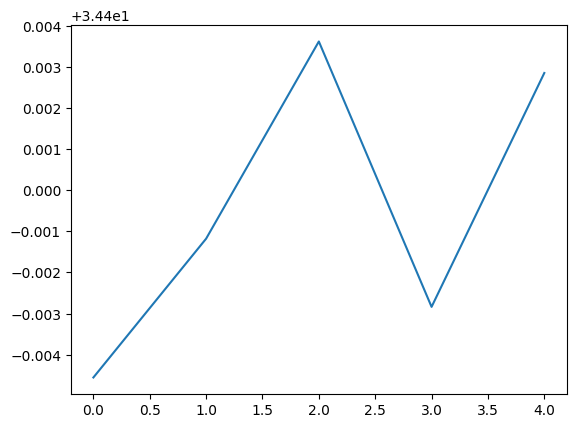

In [11]:
# line chart
df['latitude'].plot()

<Axes: >

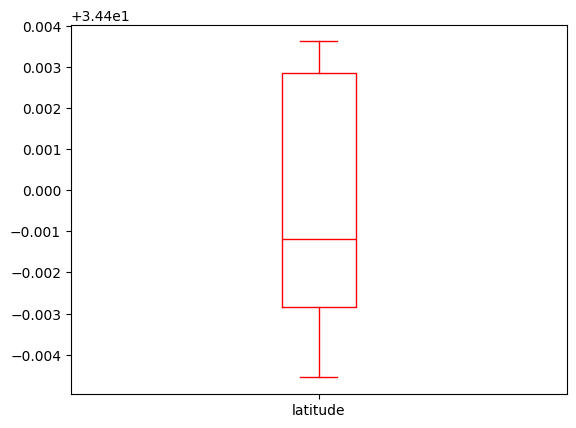

In [12]:
# boxplot 箱ヒゲ図
df['latitude'].plot.box(color='red')

<Axes: >

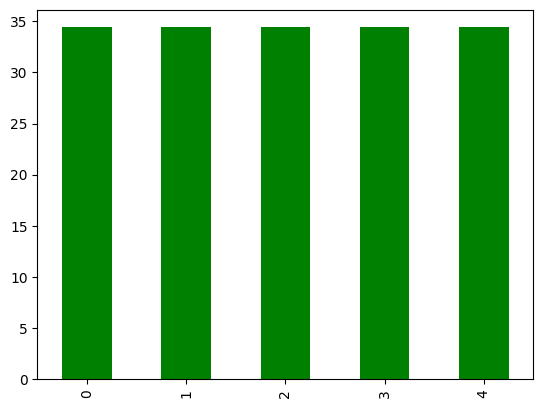

In [13]:
# bar graph
df['latitude'].plot.bar(color='green')

<Axes: xlabel='longitude', ylabel='latitude'>

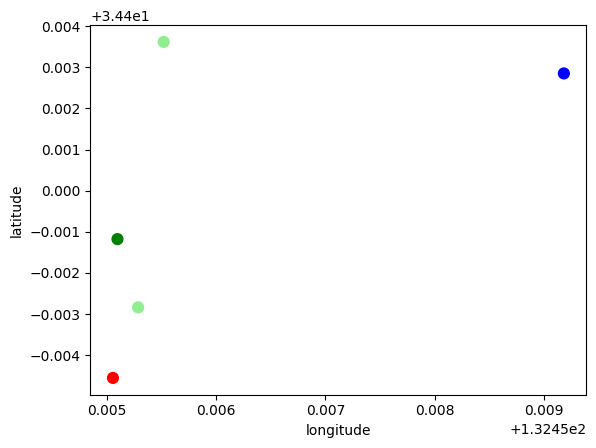

In [14]:
df.plot.scatter(x='longitude',y='latitude',c='color',s=60)

In [15]:
df['latitude'].describe()

count     5.000000
mean     34.399580
std       0.003554
min      34.395446
25%      34.397163
50%      34.398822
75%      34.402852
max      34.403618
Name: latitude, dtype: float64

In [16]:
df['longitude'].describe()

count      5.000000
mean     132.456026
std        0.001775
min      132.455053
25%      132.455094
50%      132.455283
75%      132.455518
max      132.459184
Name: longitude, dtype: float64

In [17]:
# mean 平均値
df['latitude'].mean()

34.399580046000004

In [18]:
# median 中央値
df['latitude'].median()

34.39882171

In [19]:
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

print(center_lat,center_lon)

34.399580046000004 132.45602648


In [20]:
for index, row in df.iterrows():
    print(row['name'],row['latitude'])

爆心地 34.39544552
基町（原爆スラム/応急住宅） 34.39882171
原爆スラム（応急住宅） 34.40361827
旧広島市民球場 34.39716287
広島城 天守閣 34.40285186


In [21]:
for index, row in df.iterrows():
    print(row['name'],row['latitude'],row['longitude'])

爆心地 34.39544552 132.4550527
基町（原爆スラム/応急住宅） 34.39882171 132.4550942
原爆スラム（応急住宅） 34.40361827 132.4555176
旧広島市民球場 34.39716287 132.4552834
広島城 天守閣 34.40285186 132.4591845


### サークルマーカーを使って原爆が落ちた範囲を表したMap

In [29]:
# make the map
m = folium.Map(location=[center_lat,center_lon],
               zoom_start=15,
               attr = '国土地理院')

# add basemaps
folium.TileLayer(name='1945',tiles='https://cyberjapandata.gsi.go.jp/xyz/ort_USA10/{z}/{x}/{y}.png',attr='国土地理院').add_to(m)


# df をループしてマーカーを作る
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon,
                  popup='<div style="width:950px">'+row['name']+'</div>',
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['color']
                )).add_to(m)
    
# サークルマーカープロット(外径色は赤，内径色は青)
folium.Circle(
    location=[34.39544552,132.4550527],
    radius=2000,
    color='#ff0000',
    fill_color='#0000ff'
).add_to(m)

# show the map
m

# 復興場所
## 1.**基町エリア（旧広島市民球場）**
## 2.**広島城 天守閣** 

## 実際の原爆ドーム付近の写真

![Alt text](IMG_1129b.png)

# 1.基町エリア　旧広島市民球場

## ここは基町（もとまち）という広島市中区の町の名前である。
### 当時は軍が利用した場所だったたが、市民も利用可能な場所であり憩いの場でもあったという。
### 基町は爆心地から１km以内に位置したため壊滅的な被害を受ける。





## （旧）広島市民球場　（HIROSHIMA GATE PARK）  
### まだ被爆後は荒地であった場所を1957年7月に広島市民球場が完成し、日本プロ野球・セントラル・リーグの広島東洋カープが本拠地として2009年3月31日まで用いた。2010年以降は旧広島市民球場の名称で主にアマチュア野球に使用されていたが、2010年9月1日に閉鎖され、2012年に解体された。現在はひろしまゲートパークとして生まれ変わっている。

In [23]:
# （旧）広島市民球場(HIROSHIMA GATE PARK)の緯度経度を指定
hiroshima = [34.39719724,132.4549863]

# ベースマップを指定
layers = ['https://cyberjapandata.gsi.go.jp/xyz/ort_USA10/{z}/{x}/{y}.png',
        'https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png', 
        'https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg',
        'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}']
# ラベルを指定
labels = ['1945','1961','1981','2024']

# マップを作成
m = leafmap.linked_maps(
    rows=1, 
    cols=4, 
    height='400px', 
    layers=layers, 
    center=hiroshima, 
    zoom_control=False,
    search_control=False,
    scale_control=False,
    attribution_control=False,
    zoom=17,
    labels=labels,)

m

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

## 当時の広島市民球場のようす  
![Alt](広島市民球場..png)

## 原爆ドームと市民球場  
![Alt](市民球場原爆ドーム.png)

## 旧市民球場からHIROSHIMA GATE PARKへ
![Alt](広島ゲートパーク.png)

# 2.広島城　天守閣
### 爆心地から1km離れた広島城は原爆によって崩れ落ち石垣だけとなってしまった。
### 復興が進む中、広島城再建の声が高まり、1958年の「広島復興大博覧会」に合わせて現在の広島城に復元された。

In [24]:
# 広島城 天守閣の緯度経度を指定
hiroshima = [34.40272253,132.4592946]

# ベースマップを指定
layers = ['https://cyberjapandata.gsi.go.jp/xyz/ort_USA10/{z}/{x}/{y}.png',
        'https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png', 
        'https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg',
        'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}']
# ラベルを指定
labels = ['1945','1961','1981','2024']

# マップを作成
m = leafmap.linked_maps(
    rows=1, 
    cols=4, 
    height='400px', 
    layers=layers, 
    center=hiroshima, 
    zoom_control=False,
    search_control=False,
    scale_control=False,
    attribution_control=False,
    zoom=17,
    labels=labels,)

m

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

## 被爆後の広島城  
![Alt](hirocastle.png)
![Alt](hiroshimacas1945.png)

## 1958年 広島城復興後 広島大復興展覧会
![Alt](hiroshimacas1958.png)

##   現在の広島城  
![Alt](広島城.png)

# 1945年と2024年

In [25]:
hiroshima=[34.39544552,132.4550527]
m = leafmap.split_map(
    left_layer="https://cyberjapandata.gsi.go.jp/xyz/ort_USA10/{z}/{x}/{y}.png",
    right_layer="https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}",
    left_label="1945",
    right_label="2024",
    left_position="bottom",
    center=hiroshima, 
    attribution_control=False,
    zoom=14.5,
)

#爆心地
m.add_markers(
    markers=[hiroshima, [34.39544552,132.4550527]],
    shape='circle',
    radius=20,
    color='red',
    fill_color='#ff0000',
    fill_opacity=0.5,
)

#基町エリア
m.add_markers(
    markers=[hiroshima, [34.39882171,132.4550942]],
    shape='circle',
    radius=10,
    color='green',
    fill_color='#00ff00',
    fill_opacity=0.5,
)

#原爆スラム（応急住宅）
m.add_markers(
    markers=[hiroshima, [34.40361827,132.4555176]],
    shape='circle',
    radius=10,
    color='lightgreen',
    fill_color='#ffff00',
    fill_opacity=0.5,
)

#旧広島市民球場
m.add_markers(
    markers=[hiroshima, [34.39719724,132.4549863]],
    shape='circle',
    radius=10,
    color='lightgreen',
    fill_color='#ffff00',
    fill_opacity=0.5,
)

#広島城 天守閣
m.add_markers(
    markers=[hiroshima, [34.40272253,132.4592946]],
    shape='circle',
    radius=10,
    color='blue',
    fill_color='#0000FF',
    fill_opacity=0.5,
)



m

Map(center=[34.39544552, 132.4550527], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…